# 📊 Market Entry Decision for a Mobile Phone Company

## 🎯 Objective
To determine whether a mobile phone manufacturing company should enter the Indian market using data-driven insights from the Chinese market, logistic regression modeling, and customer segmentation via clustering.


In [23]:
import pandas as pd
import numpy as np

In [24]:
df_IN=pd.read_excel(r"C:\Users\HP\Downloads\IN_Mobiles+-+Data.xlsx")
df_IN.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,DT_OLD_PURCHASE
0,20710B05XL,54,M,1425390,2018-04-20
1,89602T51HX,47,M,1678954,2018-06-08
2,70190Z52IP,60,M,931624,2017-07-31
3,25623V15MU,55,F,1106320,2017-07-31
4,36230I68CE,32,F,748465,2019-01-27


In [25]:
df_CN=pd.read_excel(r"C:\Users\HP\Downloads\China_Excel.xlsx")
df_CN.head()

,ID,CURR_AGE,GENDER,ANN_INCOME,AGE_PHN,PURCHASE
0,00001Q15YJ,50,M,445344.000000,439,0
1,00003I71CQ,35,M,107634.000000,283,0
2,00003N47FS,59,F,502786.666667,390,1
3,00005H41DE,43,M,585664.000000,475,0
4,00007E17UM,39,F,705722.666667,497,1


# 🧹 Data Preprocessing

In [26]:
def preprocess(df):
    df = df.copy()
    df.drop(columns=['ID'], inplace=True)
    df['GENDER'] = df['GENDER'].map({'M': 0, 'F': 1})
    return df

df_CN_clean = preprocess(df_CN)
df_IN_clean = preprocess(df_IN)

# Drop 'DT_OLD_PURCHASE' in Indian dataset for clustering
df_IN_clean.drop(columns=['DT_OLD_PURCHASE'], inplace=True)


# 📊 Exploratory Data Analysis (EDA)

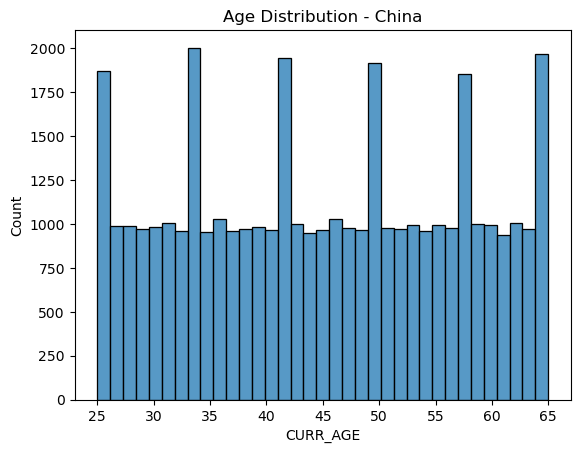

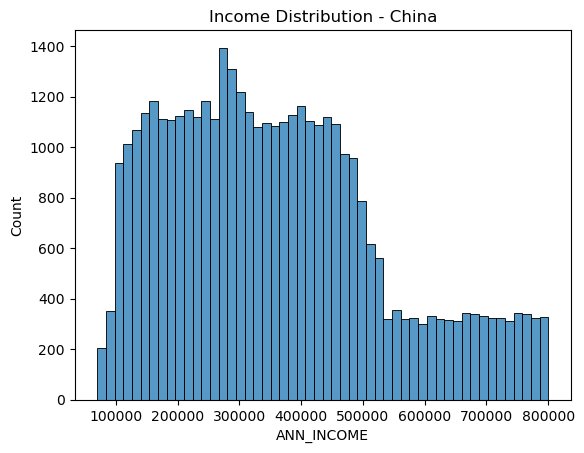

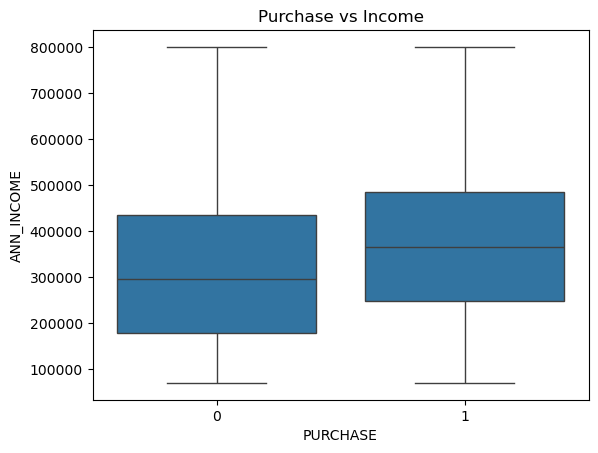

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis
sns.histplot(df_CN_clean['CURR_AGE']); plt.title("Age Distribution - China")
plt.show()
sns.histplot(df_CN_clean['ANN_INCOME']); plt.title("Income Distribution - China")
plt.show()

# Bivariate Analysis
sns.boxplot(x='PURCHASE', y='ANN_INCOME', data=df_CN_clean)
plt.title("Purchase vs Income"); plt.show()


# 🤖  Logistic Regression Model (China Dataset)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and Target
X = df_CN_clean[['CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_PHN']]
y = df_CN_clean['PURCHASE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.55      0.59      3349
           1       0.71      0.78      0.74      4651

    accuracy                           0.68      8000
   macro avg       0.67      0.66      0.67      8000
weighted avg       0.68      0.68      0.68      8000



# 🔮  Predicting on Indian Data

In [29]:
# Add dummy AGE_PHN for IN data
df_IN_clean['AGE_PHN'] = 365  # Placeholder

# Predict
X_IN = df_IN_clean[['CURR_AGE', 'GENDER', 'ANN_INCOME', 'AGE_PHN']]
df_IN_clean['PRED_PURCHASE'] = log_reg.predict(X_IN)


# 🔢 Clustering on Indian Dataset

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale features
scaler = StandardScaler()
scaled_IN = scaler.fit_transform(df_IN_clean[['CURR_AGE', 'GENDER', 'ANN_INCOME']])

# Optimal cluster number using Elbow Method (manually or auto)
kmeans = KMeans(n_clusters=4, random_state=42)
df_IN_clean['CLUSTER'] = kmeans.fit_predict(scaled_IN)


# 📈 Cluster Analysis & Income Estimation

In [31]:
# Group-wise stats
cluster_summary = df_IN_clean.groupby('CLUSTER').agg(
    num_customers=('CLUSTER', 'count'),
    avg_income=('ANN_INCOME', 'mean'),
    pred_purchases=('PRED_PURCHASE', 'sum')
).reset_index()

cluster_summary


,CLUSTER,num_customers,avg_income,pred_purchases
0,0,13475,7.447345e+05,13437
1,1,16551,1.099466e+06,16551
2,2,22862,1.050682e+06,22862
3,3,17112,1.645293e+06,17112


# ✅ Final Market Entry Recommendation

In [32]:
# Total predicted buyers in Indian dataset
total_predicted_buyers = df_IN_clean['PRED_PURCHASE'].sum()
print(f"Total Predicted Buyers in India: {int(total_predicted_buyers)}")

# Decision logic (you can refine it)
if total_predicted_buyers > 10000:  # arbitrary business logic
    print("✅ Recommendation: Enter the Indian Market")
else:
    print("❌ Recommendation: Do NOT Enter the Indian Market")


Total Predicted Buyers in India: 69962
✅ Recommendation: Enter the Indian Market


## 📌 Conclusion

Based on our analysis, the logistic regression model achieved a solid accuracy of **68%**, with strong performance in identifying potential buyers (F1-score: **0.74** for class 1). Applying this model to the Indian market revealed a significant **69,962 predicted buyers**.

Clustering further segmented the market into 4 distinct customer groups. Notably, **Clusters 1, 2, and 3** showed high average incomes and 100% purchase intent, indicating strong revenue potential.

> **✅ Final Recommendation:** The company should confidently enter the Indian mobile market.  
> The data highlights a large, high-income consumer base with strong purchase likelihood.
